<h1><center> SUPPORT VECTOR MACHINE</center></h1>

<p align> Support vector machine(SVM) are defined as supervised learning models in machine learning. These models are associated with learning algorithms which are used to analyze the data which can be used for analysis classification and regression methods. It is a representation of examples as points in space which are mapped. There are many real time applications of SVM. They are used predominantly in classification problems.</p>
<p align> In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.</p>
<p align>More formally, a support vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.</p>


In [2]:
#import all the packages needed for the program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

We are using the iris dataset. This dataset consists of 150 instances and 4 attributes. The 4 attributes are sepal length, sepal width, petal length and petal width which are all measured in centimetres. We are using sepal length and sepal width to predict whether the flower is Iris Setosa, Iris Versicolour or Iris Virginica. We denote 1 for Iris Setosa, 2 for Iris Versicolor and 3 for Iris Virginica.
We are loading the dataset and considering only two features, sepal length and sepal width for our implementation

In [4]:
#Reading features and response from the csv file using pandas 
df=pd.read_csv("/home/sathyanarayanan/iris.csv")
X=df.iloc[:,0:2]
Y=df[["Y"]]

In [5]:
#Converting X and Y to matrix format 
x=np.asmatrix(X)
y=np.asmatrix(Y)
y=np.ravel(y)

In [6]:
#Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

<p>Here, we are defining a function called performance. It computes the percentage of correct predictions and returns the accuracy</p>

In [7]:
def performance(Y_test,y_pred):
    correct=0
    for i in range(len(Y_test)):
        if Y_test[i] == y_pred[i]:
            correct += 1
    accuracy=correct / float(len(Y_test)) * 100.0
    return accuracy

<p align> Here we are tning our hyper parameters needed for grid search </p>

In [8]:
#parameter tuning
tuned_params_linear={"C":[1e0,0.1,1e-2,1e-3,0.5,2,3,5]}

<p>We are using gridsearchCV to perform Linear Kernel SVM and to tune our hyper parameters. We use 5 fold cross validation in grid search. We calculate accuracy using our function performance.</p>

In [9]:
#Performing grid search for linear kernel
grid_linear = GridSearchCV(svm.SVC(kernel='linear',C=tuned_params_linear["C"]),tuned_params_linear, cv=5)

In [10]:
#Invoking the classifier
grid_linear.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=[1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5], cache_size=200,
  class_weight=None, coef0=0.0, decision_function_shape=None, degree=3,
  gamma='auto', kernel='linear', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [11]:
#Printing the mean and standard deviation for the hyperparameter C
grid_linear.grid_scores_

[mean: 0.78333, std: 0.06896, params: {'C': 1.0},
 mean: 0.77500, std: 0.05229, params: {'C': 0.1},
 mean: 0.62500, std: 0.07753, params: {'C': 0.01},
 mean: 0.36667, std: 0.00688, params: {'C': 0.001},
 mean: 0.78333, std: 0.08143, params: {'C': 0.5},
 mean: 0.75833, std: 0.07143, params: {'C': 2},
 mean: 0.75833, std: 0.07143, params: {'C': 3},
 mean: 0.75833, std: 0.07143, params: {'C': 5}]

In [12]:
#finding best parameter
grid_linear.best_params_

{'C': 1.0}

In [13]:
grid_linear.best_score_

0.7833333333333333

<p>The best score obtained was 0.783 for the hyperparameter value C=1.0</p>

In [14]:
#Calculating the predicted values 
Y_pred_lin=grid_linear.predict(X_test)

In [15]:
#Accuracy calculation
acc_lin=performance(Y_test,Y_pred_lin)

In [65]:
print("accuracy of linear kernel is " + str(acc_lin)+ "%")

accuracy of linear kernel is 80.0%


In [17]:
#parameter tuning for gaussian kernel
tuned_params_gauss={"C":[1e0,0.1,1e-2,1e-3,0.5,2,3,5],"gamma":[0.001,0.0001,0.01,0.1,1,0.5,2,3,10]}

<p>We are using gridsearchCV to perform Gaussian Kernel SVM and to tune our hyper parameters. We use 5 fold cross validation in grid search. We calculate accuracy using our function performance.</p>

In [18]:
#Performing grid search
grid_gauss = GridSearchCV(svm.SVC(kernel='rbf', gamma=tuned_params_gauss["gamma"], C=tuned_params_gauss["C"]),tuned_params_gauss, cv=5)

In [19]:
#Invoking the classifier
grid_gauss.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=[1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5], cache_size=200,
  class_weight=None, coef0=0.0, decision_function_shape=None, degree=3,
  gamma=[0.001, 0.0001, 0.01, 0.1, 1, 0.5, 2, 3, 10], kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.0001, 0.01, 0.1, 1, 0.5, 2, 3, 10], 'C': [1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [20]:
#Printing the grid_scores for different combinations of hyperparameters
grid_gauss.grid_scores_

[mean: 0.36667, std: 0.00688, params: {'gamma': 0.001, 'C': 1.0},
 mean: 0.36667, std: 0.00688, params: {'gamma': 0.0001, 'C': 1.0},
 mean: 0.67500, std: 0.02333, params: {'gamma': 0.01, 'C': 1.0},
 mean: 0.78333, std: 0.08143, params: {'gamma': 0.1, 'C': 1.0},
 mean: 0.77500, std: 0.07450, params: {'gamma': 1, 'C': 1.0},
 mean: 0.75833, std: 0.08154, params: {'gamma': 0.5, 'C': 1.0},
 mean: 0.78333, std: 0.08270, params: {'gamma': 2, 'C': 1.0},
 mean: 0.78333, std: 0.06468, params: {'gamma': 3, 'C': 1.0},
 mean: 0.70833, std: 0.02599, params: {'gamma': 10, 'C': 1.0},
 mean: 0.36667, std: 0.00688, params: {'gamma': 0.001, 'C': 0.1},
 mean: 0.36667, std: 0.00688, params: {'gamma': 0.0001, 'C': 0.1},
 mean: 0.36667, std: 0.00688, params: {'gamma': 0.01, 'C': 0.1},
 mean: 0.67500, std: 0.02333, params: {'gamma': 0.1, 'C': 0.1},
 mean: 0.75000, std: 0.04422, params: {'gamma': 1, 'C': 0.1},
 mean: 0.70833, std: 0.02599, params: {'gamma': 0.5, 'C': 0.1},
 mean: 0.70833, std: 0.03910, params:

In [21]:
#getting best parameters
grid_gauss.best_params_

{'C': 2, 'gamma': 2}

In [58]:
#getting best score
grid_gauss.best_score_

0.8

<p align> We are getting the best score as 0.8 for our best parameters </p>

In [22]:
#Calculating predicted values
y_pred_gauss=grid_gauss.predict(X_test)

In [23]:
#Accuracy calculation
acc_gauss=performance(Y_test,y_pred_gauss)

In [66]:
print("accuracy of gaussian kernel is "+ str(acc_gauss) +"%")

accuracy of gaussian kernel is 80.0%


In [25]:
#Parameter tuning 
tuned_params_poly={"degree":[2,3,4,5],"C":[1e0,0.1,1e-2,1e-3,0.5,2,3,5]}

In [26]:
#Performing grid search
grid_poly = GridSearchCV(svm.SVC(kernel='poly',degree=tuned_params_poly["degree"], C=tuned_params_poly["C"]),tuned_params_poly, cv=5)

<p>We are using gridsearchCV to perform Polynomial Kernel SVM and to tune our hyper parameters. We use 5 fold cross validation in grid search. We calculate accuracy using our function performance.</p>

In [27]:
#invoking classifier
grid_poly.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=[1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5], cache_size=200,
  class_weight=None, coef0=0.0, decision_function_shape=None,
  degree=[2, 3, 4, 5], gamma='auto', kernel='poly', max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 0.1, 0.01, 0.001, 0.5, 2, 3, 5], 'degree': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [28]:
#Calculating best scores for polynomial kernel
grid_poly.grid_scores_

[mean: 0.75833, std: 0.05042, params: {'C': 1.0, 'degree': 2},
 mean: 0.79167, std: 0.05747, params: {'C': 1.0, 'degree': 3},
 mean: 0.77500, std: 0.06368, params: {'C': 1.0, 'degree': 4},
 mean: 0.78333, std: 0.08476, params: {'C': 1.0, 'degree': 5},
 mean: 0.76667, std: 0.04474, params: {'C': 0.1, 'degree': 2},
 mean: 0.77500, std: 0.05496, params: {'C': 0.1, 'degree': 3},
 mean: 0.77500, std: 0.03920, params: {'C': 0.1, 'degree': 4},
 mean: 0.78333, std: 0.05275, params: {'C': 0.1, 'degree': 5},
 mean: 0.80000, std: 0.06896, params: {'C': 0.01, 'degree': 2},
 mean: 0.75000, std: 0.03844, params: {'C': 0.01, 'degree': 3},
 mean: 0.77500, std: 0.08421, params: {'C': 0.01, 'degree': 4},
 mean: 0.77500, std: 0.03920, params: {'C': 0.01, 'degree': 5},
 mean: 0.66667, std: 0.02662, params: {'C': 0.001, 'degree': 2},
 mean: 0.78333, std: 0.06341, params: {'C': 0.001, 'degree': 3},
 mean: 0.77500, std: 0.03920, params: {'C': 0.001, 'degree': 4},
 mean: 0.79167, std: 0.06771, params: {'C': 0

In [60]:
grid_poly.best_params_

{'C': 0.01, 'degree': 2}

In [61]:
grid_poly.best_score_

0.8

<p align>We are getting the best score as 0.8 for our best parameters</p>

In [30]:
#Calculating predicted values
y_pred_poly=grid_poly.predict(X_test)

In [31]:
#Accuracy calculation
acc_poly=performance(Y_test,y_pred_poly)

In [67]:
print("accuracy of polynomial kernel is "+str(acc_poly)+"%")

accuracy of polynomial kernel is 83.33333333333334%


<p align> From the above we can come to a conclusion that gaussian kernel performs better for our dataset. We verify this by visualising trivial dataset and estimating its performance.</p>

In [248]:
#Shuffling of the dataframe
dataset=df.sample(frac=1)

<p>trivial_X contains two features- sepal length and sepal width and trivial_Y contains the response.</p> 

In [249]:
trivial_X=dataset.iloc[:,0:2]
trivial_Y=dataset[["Y"]]

In [250]:
#Converting the trivial dataset to matrix format
trivial_x=np.asmatrix(trivial_X)
trivial_y=np.asmatrix(trivial_Y)
trivial_y=np.ravel(trivial_y)

In [251]:
#sample data for plotting graph with few datapoints
sample_x_train=trivial_x[0:50,:]
sample_y_train=trivial_y[0:50,]
sample_x_test=trivial_x[80:120,:]
sample_y_test=trivial_y[80:120,]

In [252]:
#Parameter tuning
tune_param_lin_plot={"C":[1.0]}

In [253]:
#Grid search
grid_linear_plot = GridSearchCV(svm.SVC(kernel='linear',C=tune_param_lin_plot["C"]),tune_param_lin_plot,cv=5)

<p>We are using gridsearchCV to perform the computations inside fit method of the classifier and use 5 fold cross validation and tuning of hyper parameters using grid search. We calculate accuracy using our function performance.</p>

In [254]:
grid_linear_plot.fit(sample_x_train,sample_y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=[1.0], cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'C': [1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [255]:
#Calculating predicted values for the linear kernel plot
y_pred_lin_plot=grid_linear_plot.predict(sample_x_test)

In [256]:
#Accuracy calculation for the linear kernel plot
acc_lin_plot=performance(sample_y_test,y_pred_lin_plot)

In [273]:
print("accuracy of SVM linear kernel is "+str(acc_lin_plot)+"%")

accuracy of SVM linear kernel is 82.5%


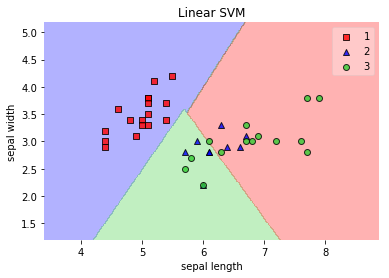

In [258]:
#Graph plotting for linear SVM
plot_decision_regions(np.asarray(sample_x_test),np.asarray(sample_y_test),grid_linear_plot)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Linear SVM")
plt.show()

In [259]:
#Parameter tuning
tuned_params_poly_plot={"degree":[2],"C":[0.01]}

In [260]:
#Performing grid search
grid_poly_plot = GridSearchCV(svm.SVC(kernel='poly',degree=tuned_params_poly_plot["degree"], C=tuned_params_poly_plot["C"]),tuned_params_poly_plot, cv=5)

In [261]:
grid_poly_plot.fit(sample_x_train,sample_y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=[0.01], cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=[2], gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01], 'degree': [2]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [262]:
#Calculating predicted values for polynomial kernel for trivial dataset
y_pred_poly_plot=grid_poly_plot.predict(sample_x_test)

In [263]:
#Calculating accuracy for polynomial kernel plot
acc_poly_plot=performance(sample_y_test,y_pred_poly_plot)

In [274]:
print("accuracy of SVM polynomial kernel is "+str(acc_poly_plot)+"%")

accuracy of SVM polynomial kernel is 82.5%


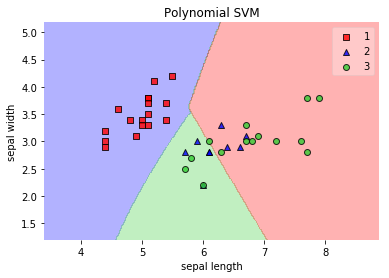

In [265]:
#plotting graph 
plot_decision_regions(np.asarray(sample_x_test),np.asarray(sample_y_test),grid_poly_plot)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Polynomial SVM")
plt.show()

In [266]:
#Parameter tuning
tuned_params_gauss_plot={"gamma":[2],"C":[2]}

In [267]:
#Performing grid search
grid_gauss_plot = GridSearchCV(svm.SVC(kernel='rbf',gamma=tuned_params_gauss_plot["gamma"], C=tuned_params_gauss_plot["C"]),tuned_params_gauss_plot, cv=5)

In [268]:
grid_gauss_plot.fit(sample_x_train,sample_y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=[2], cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=[2], kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [2], 'C': [2]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [269]:
#Calculating predicted values for gaussian kernel plot
y_pred_gauss_plot=grid_gauss_plot.predict(sample_x_test)

In [270]:
#Accuracy calculation for gaussian kernel plot
acc_gauss_plot=performance(sample_y_test,y_pred_gauss_plot)

In [275]:
print("accuracy of SVM gaussian kernel is "+str(acc_gauss_plot)+"%")

accuracy of SVM gaussian kernel is 77.5%


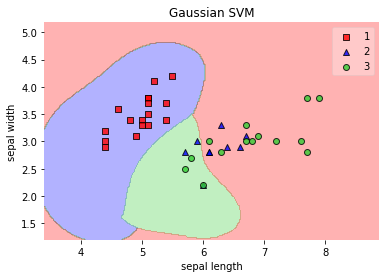

In [272]:
#Plotting graph for gaussian SVM
plot_decision_regions(np.asarray(sample_x_test),np.asarray(sample_y_test),grid_gauss_plot)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Gaussian SVM")
plt.show()

<p><b>Conclusion:</b> From the above graphs, it is clear that the polynomial SVM performs better than the linear and gaussian models for the iris dataset that we have considered.</p>